In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import akshare as ak
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import datetime

In [2]:
exchange_rate_orign_2023df = ak.currency_boc_sina(symbol="加拿大元", start_date="20230101", end_date="20231115")

In [3]:
# Select data which I interested in and rename the columns of dataframe
exchange_rates_2023 = exchange_rate_orign_2023df[['日期','中行钞卖价/汇卖价', '中行汇买价']].rename(
        columns={
            "日期": "date", # type: datetime.dat
            "中行钞卖价/汇卖价": "bank_selling_exchange_rate", # The amount of Chinese currency that Bank of China willing to sell 100 CAD$ to you
            '中行汇买价':"bank_buying_exchange_rate" # The amount of Chinese currency that Bank of China is willing to buy 100 CAD$ from you
            }
        )
exchange_rates_2023

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
0,2023-01-02,511.20,507.46
1,2023-01-03,509.10,505.38
2,2023-01-04,511.27,507.53
3,2023-01-05,509.06,505.34
4,2023-01-06,507.79,504.07
...,...,...,...
223,2023-11-09,531.69,528.15
224,2023-11-10,528.62,525.10
225,2023-11-13,530.17,526.64
226,2023-11-14,530.32,526.79


In [4]:
exchange_rates_2023.iloc[0]

date                          2023-01-02
bank_selling_exchange_rate         511.2
bank_buying_exchange_rate         507.46
Name: 0, dtype: object

In [5]:
exchange_rates_2023.loc[0, 'date']

datetime.date(2023, 1, 2)

In [6]:
exchange_rates_2023.set_index(exchange_rates_2023['date'], inplace=True)


In [7]:
exchange_rates_2023

,date,bank_selling_exchange_rate,bank_buying_exchange_rate
date,,,
2023-01-02,2023-01-02,511.20,507.46
2023-01-03,2023-01-03,509.10,505.38
2023-01-04,2023-01-04,511.27,507.53
2023-01-05,2023-01-05,509.06,505.34
2023-01-06,2023-01-06,507.79,504.07
...,...,...,...
2023-11-09,2023-11-09,531.69,528.15
2023-11-10,2023-11-10,528.62,525.10
2023-11-13,2023-11-13,530.17,526.64


In [8]:
exchange_rates_2023.iloc[0, 0]

datetime.date(2023, 1, 2)

In [9]:
exchange_rates_2023.loc[datetime.date(2023, 1, 2), 'bank_selling_exchange_rate']

511.2

In [10]:
exchange_rates_2023.index

Index([2023-01-02, 2023-01-03, 2023-01-04, 2023-01-05, 2023-01-06, 2023-01-09,
       2023-01-10, 2023-01-11, 2023-01-12, 2023-01-13,
       ...
       2023-11-02, 2023-11-03, 2023-11-06, 2023-11-07, 2023-11-08, 2023-11-09,
       2023-11-10, 2023-11-13, 2023-11-14, 2023-11-15],
      dtype='object', name='date', length=228)

In [11]:
exchange_rates_2023['date']

date
2023-01-02    2023-01-02
2023-01-03    2023-01-03
2023-01-04    2023-01-04
2023-01-05    2023-01-05
2023-01-06    2023-01-06
                 ...    
2023-11-09    2023-11-09
2023-11-10    2023-11-10
2023-11-13    2023-11-13
2023-11-14    2023-11-14
2023-11-15    2023-11-15
Name: date, Length: 228, dtype: object

In [12]:
exchange_rates_2023['bank_buying_exchange_rate']

date
2023-01-02    507.46
2023-01-03    505.38
2023-01-04    507.53
2023-01-05    505.34
2023-01-06    504.07
               ...  
2023-11-09    528.15
2023-11-10    525.10
2023-11-13    526.64
2023-11-14    526.79
2023-11-15    528.93
Name: bank_buying_exchange_rate, Length: 228, dtype: float64

In [13]:
selling_rates_2023 = exchange_rates_2023['bank_buying_exchange_rate']


In [14]:
selling_rates_2023

date
2023-01-02    507.46
2023-01-03    505.38
2023-01-04    507.53
2023-01-05    505.34
2023-01-06    504.07
               ...  
2023-11-09    528.15
2023-11-10    525.10
2023-11-13    526.64
2023-11-14    526.79
2023-11-15    528.93
Name: bank_buying_exchange_rate, Length: 228, dtype: float64

<Axes: xlabel='date'>

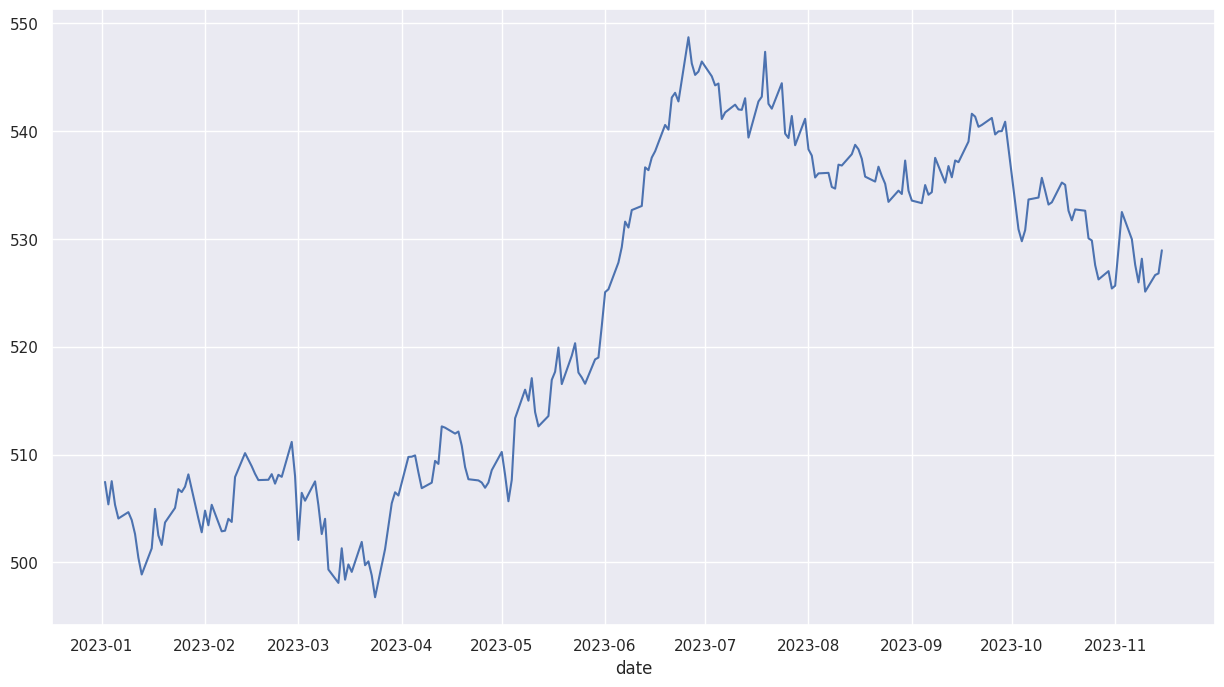

In [15]:
mpl.rcParams.update({
    'figure.figsize': [15, 8]
})
selling_rates_2023.plot()


In [16]:
selling_rates_2023.index = pd.to_datetime(selling_rates_2023.index)
selling_rates_2023.index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2023-11-02', '2023-11-03', '2023-11-06', '2023-11-07',
               '2023-11-08', '2023-11-09', '2023-11-10', '2023-11-13',
               '2023-11-14', '2023-11-15'],
              dtype='datetime64[ns]', name='date', length=228, freq=None)

In [25]:
# set frequecy to month, convert the daily period to monthly(start of each month)
# 'BMS' means start of the month (down-sampling) and only include forex trading days
selling_rates_2023.asfreq('BMS')

date
2023-01-02    507.46
2023-02-01    504.80
2023-03-01    502.09
2023-04-03    509.78
2023-05-01    510.24
2023-06-01    525.05
2023-07-03    545.06
2023-08-01    538.29
2023-09-01    533.54
2023-10-02    533.42
2023-11-01    525.65
Freq: BMS, Name: bank_buying_exchange_rate, dtype: float64

In [27]:
# resample monthly and take average value (down-sample, record the mean value on the start of each month)
selling_rates_2023.resample(rule='BMS').mean()

date
2023-01-02    504.309091
2023-02-01    506.893500
2023-03-01    502.168696
2023-04-03    509.253000
2023-05-01    515.424348
2023-06-01    537.564545
2023-07-03    542.273333
2023-08-01    536.157391
2023-09-01    537.820476
2023-10-02    531.584545
2023-11-01    527.849091
Freq: BMS, Name: bank_buying_exchange_rate, dtype: float64

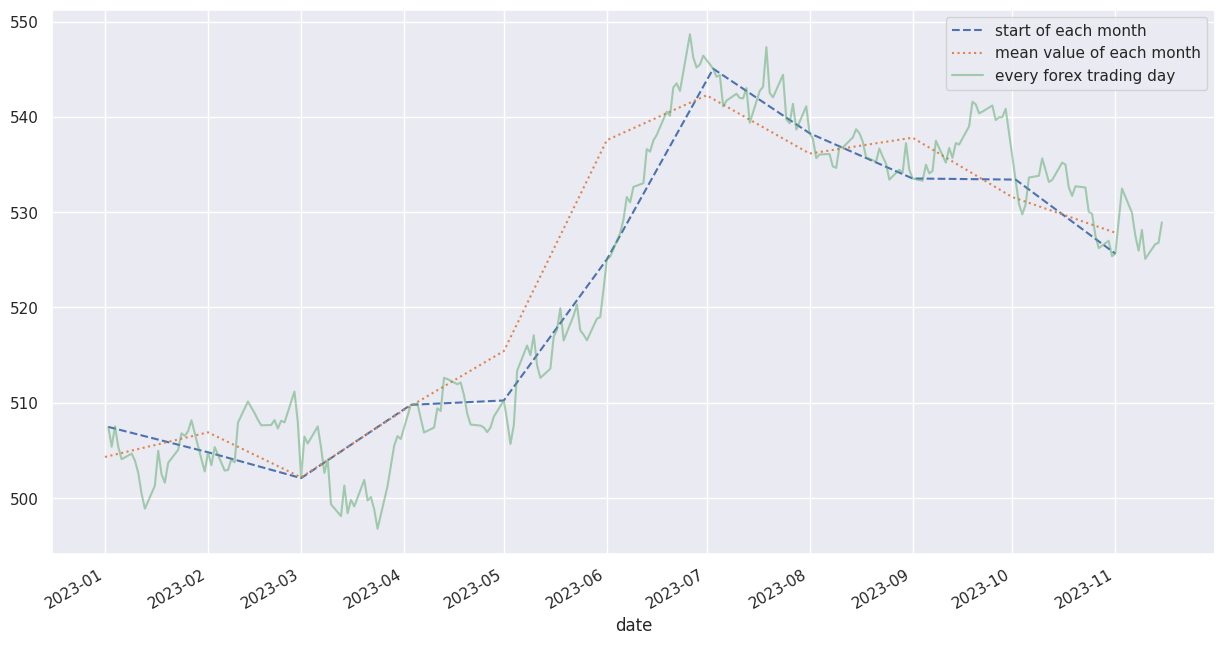

In [33]:
selling_rates_2023.asfreq('BMS').plot(style='--', label='start of each month')
selling_rates_2023.resample('MS').mean().plot(style=':', label='mean value of each month')
selling_rates_2023.plot(alpha=0.5, style='-', label = 'every forex trading day')
plt.legend()